In [2]:
%load_ext autoreload
%autoreload 2

In [14]:
from spectral_utils import ws_to_adj, laplacian
import matplotlib.pyplot as plt

In [15]:
import torch

ws = []
lsizes = [128, 100, 128]
for i in range (1, len(lsizes)):
    ws.append(torch.ones(lsizes[i], lsizes[i-1], device = "cuda"))
    print(ws[-1].shape)

torch.Size([100, 128])
torch.Size([128, 100])


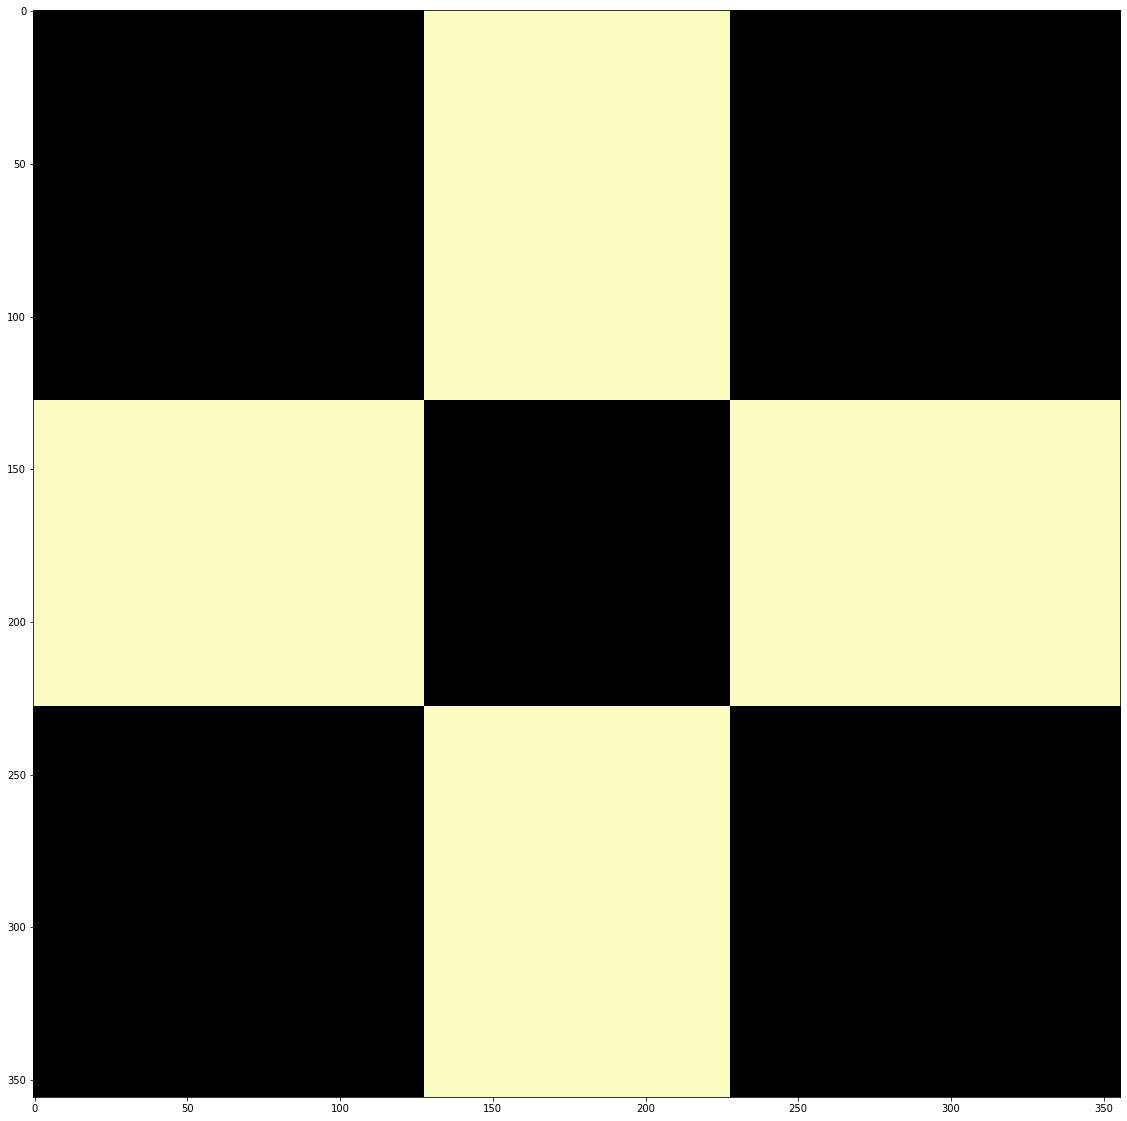

In [16]:
adj = ws_to_adj(ws)

plt.figure(figsize=(20, 20)) 
plt.imshow(adj.cpu(), cmap='magma')

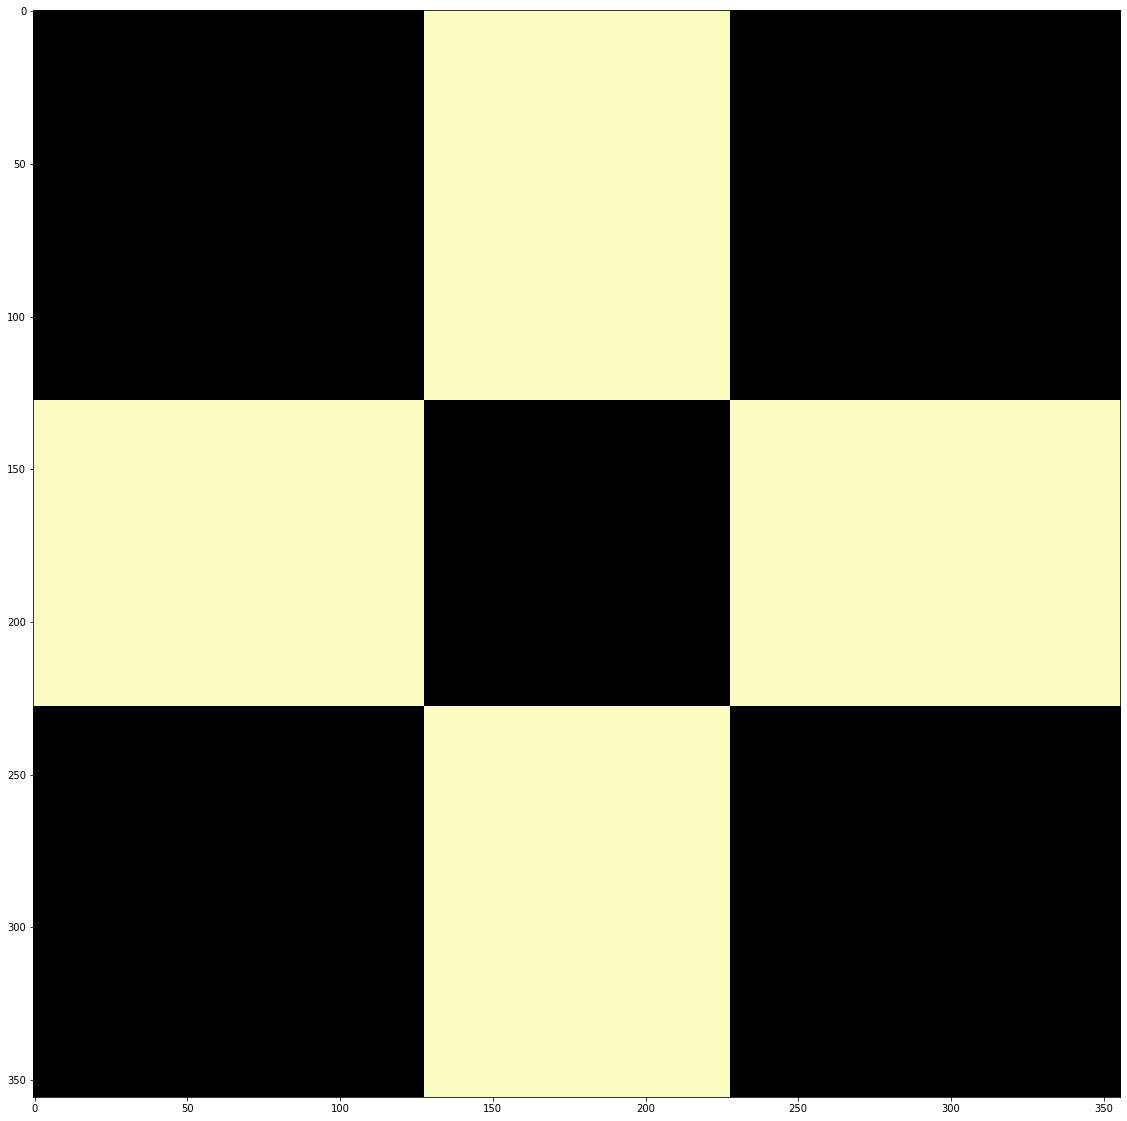

In [17]:
ws[0][2:] = 2

plt.figure(figsize=(20, 20)) 
plt.imshow(adj.cpu(), cmap='magma')

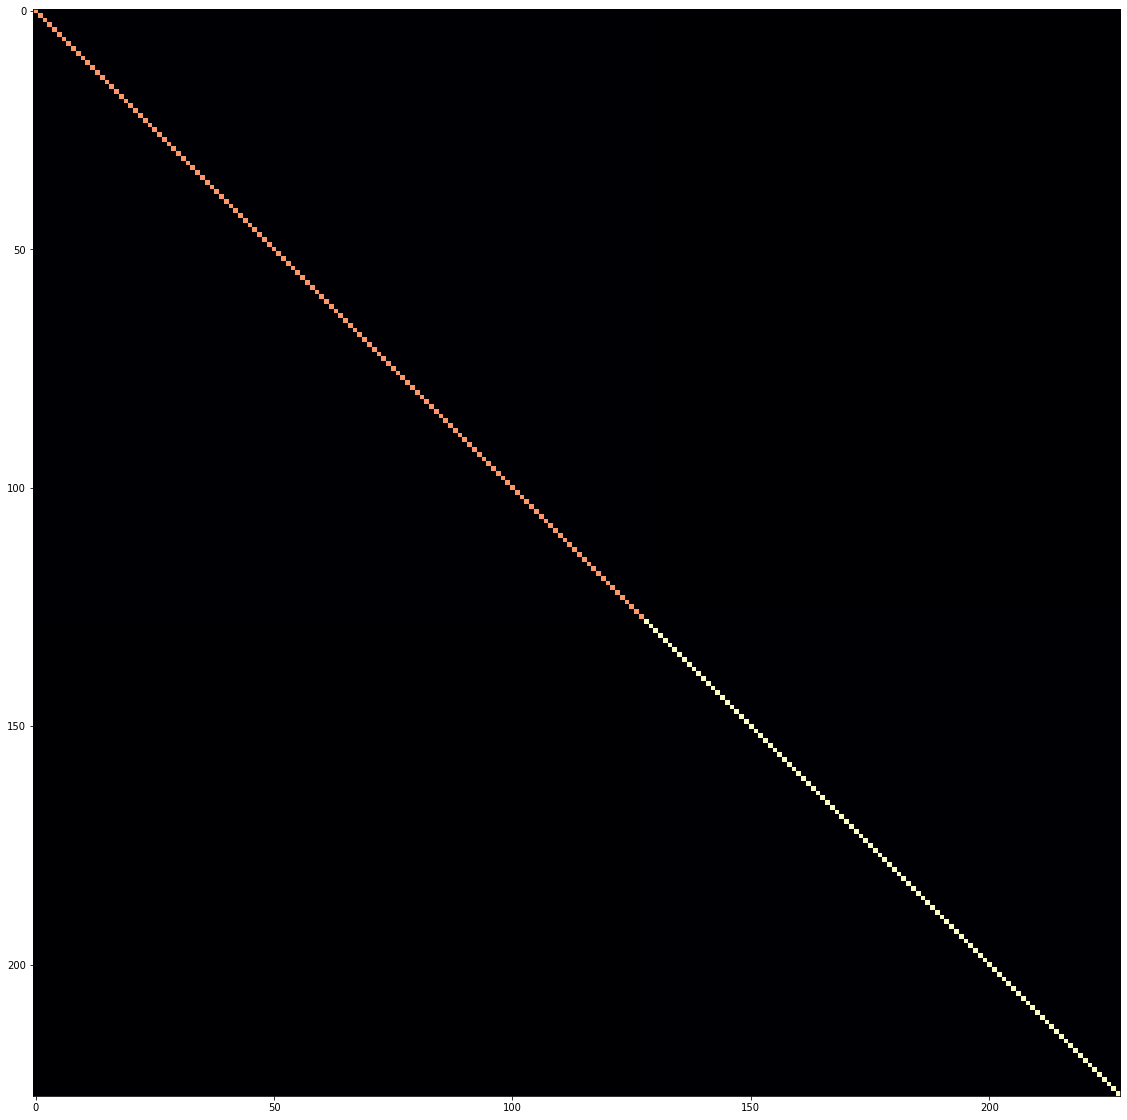

In [14]:
lapl = laplacian(adj, norm=None)

plt.figure(figsize=(20, 20)) 
plt.imshow(lapl.detach().numpy(), cmap='magma')

In [15]:
evals, evecs = torch.symeig(lapl, eigenvectors=True)
evals, evecs

(tensor([4.5776e-05, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02, 1.0000e+02,
         1.0000e+02, 1.0000e

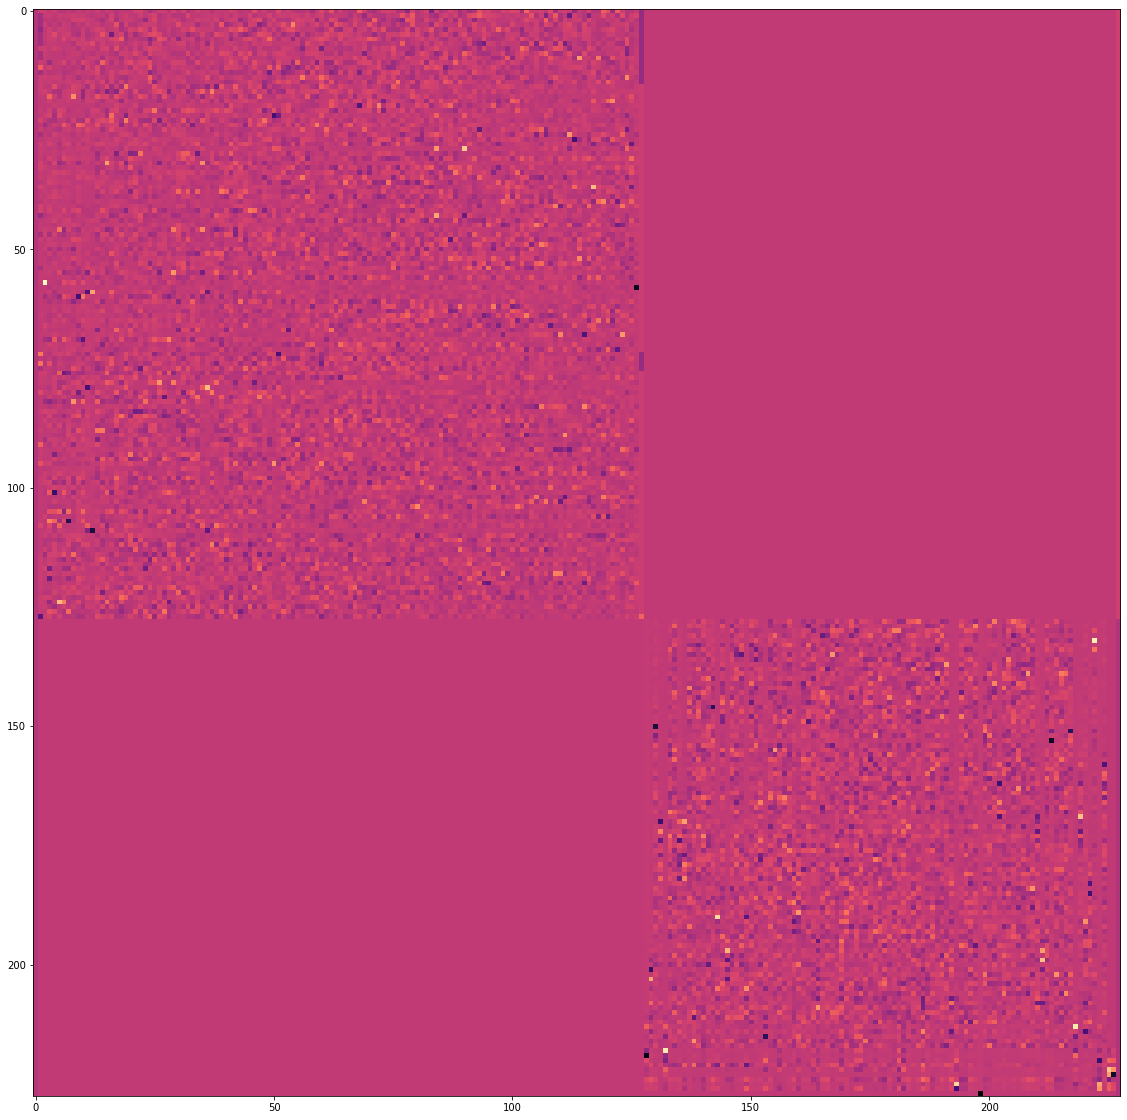

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20)) 
plt.imshow(evecs.detach().numpy(), cmap='magma')

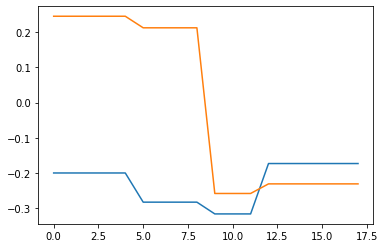

In [27]:
plt.plot(evecs[:, [0, 1]].detach().numpy())

In [24]:
evals.detach().numpy()

array([-1.2294224e-07,  3.8762754e-01,  9.9999952e-01,  9.9999958e-01,
        9.9999964e-01,  9.9999970e-01,  9.9999982e-01,  9.9999994e-01,
        1.0000000e+00,  1.0000000e+00,  1.0000000e+00,  1.0000000e+00,
        1.0000001e+00,  1.0000001e+00,  1.0000001e+00,  1.0000002e+00,
        1.6123723e+00,  2.0000000e+00], dtype=float32)

In [1]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [6]:
import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = "1.7.0" #torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install --upgrade --force-reinstall torch-scatter   -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install --upgrade --force-reinstall torch-sparse    -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install --upgrade --force-reinstall torch-cluster    -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install --upgrade --force-reinstall torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install --upgrade --force-reinstall torch-geometric 

Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu102.html
  Using cached https://pytorch-geometric.com/whl/torch-1.7.0%2Bcu102/torch_scatter-2.0.5-cp37-cp37m-linux_x86_64.whl (12.0 MB)
  Attempting uninstall: torch-scatter
    Found existing installation: torch-scatter 2.0.5
    Uninstalling torch-scatter-2.0.5:
      Successfully uninstalled torch-scatter-2.0.5
Looking in links: https://pytorch-geometric.com/whl/torch-1.7.0+cu102.html
     |████████████████████████████████| 24.3 MB 8.6 MB/s eta 0:00:01
  Using cached scipy-1.6.1-cp37-cp37m-manylinux1_x86_64.whl (27.4 MB)
  Using cached numpy-1.20.1-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.1
    Uninstalling scipy-1.6.1:
      Successfully uninstalled scipy-1.6.1
  Attempting uninstall: torch-s

      Successfully uninstalled threadpoolctl-2.1.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 53.0.0
    Uninstalling setuptools-53.0.0:
      Successfully uninstalled setuptools-53.0.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.6.1
    Uninstalling scipy-1.6.1:
      Successfully uninstalled scipy-1.6.1
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.1
    Uninstalling pytz-2021.1:
      Successfully uninstalled pytz-2021.1
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe